In [1]:
# import packages
import numpy as np
import os
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import caiman as cm

C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages

In [2]:
# Save progress 
HISTORY_FILEPATH = r"C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02.py"
def SAVE_PROGRESS(dst_file_path):
    from datetime import datetime
    dst_dir_path, dst_file_name = os.path.split(dst_file_path)
    dst_file_name = os.path.splitext(dst_file_name)[0] + "_" + datetime.today().strftime('%Y-%m-%d') + os.path.splitext(dst_file_name)[1]
    dst_file_path = os.path.join(dst_dir_path, dst_file_name)
    if not os.path.isdir(dst_dir_path):
        os.makedirs(dst_dir_path)
    if os.path.exists(dst_file_path):
        os.remove(dst_file_path)
    %history -t -g -f $dst_file_path
    print("Progress saved to: " + dst_file_path)

In [3]:
#FUNCTION: list packages 
def listPkgNames(srcDir):
    import os
    assert(os.path.exists(srcDir))
    pkgNameSuffix = "_Pkg"
    subDirNameList = [iSubDirName for iSubDirName in os.listdir(srcDir) if os.path.isdir(srcDir + "\\" + iSubDirName)]
    pkgNameList = [iSubDirName for iSubDirName in subDirNameList if iSubDirName[-len(pkgNameSuffix):] == pkgNameSuffix]
    return pkgNameList

SAVE_PROGRESS(HISTORY_FILEPATH)

Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-08-28.py


In [9]:
# source configuration
which_field = 1 # 0: spike_invalid, 1: spike_valid, 2:spikes
src_root_dir_path = r"M:\2023-05-11\M347\FOV02\Group01"

# src_root_dir_path = r"M:\2023-05-12\M347\FOV01\Group02"

src_rasterplot_subdir_name = r"RasterPlot"
src_rasterplot_hdf5_file_name = r"RasterPlotData.hdf5"
src_volpy_subdir_name = r"VolpyResults"
src_volpy_hdf5_file_name = r"results.hdf5"

src_template_dir_name = r"M:\2023-05-11\M347\FOV02\Group01\TemplateROIs"
# src_template_dir_name = r"M:\2023-05-12\M347\FOV01\Group01\TemplateROIs"

src_template_file_name = r"Template.tif"
src_mask_dir_name = src_template_dir_name
src_mask_file_name = r"Masks.tif"
dst_root_dir_path = src_root_dir_path
# dst_data_sub_dir_name = "reportPlots"
dst_data_sub_dir_name = "reportPlots_all"

SAVE_PROGRESS(HISTORY_FILEPATH)

Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-08-28.py


Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-08-28.py


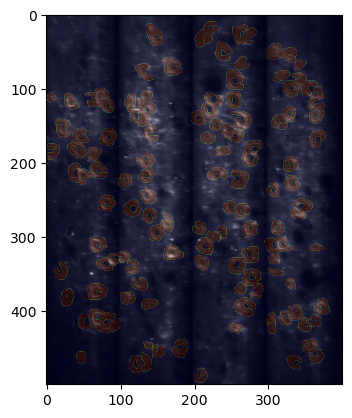

In [10]:
# load template and masks
src_template_file_path = os.path.join(src_root_dir_path, src_template_dir_name, src_template_file_name)
src_template = cm.load(src_template_file_path)

src_mask_file_path = os.path.join(src_root_dir_path, src_mask_dir_name, src_mask_file_name)
src_masks = cm.load(src_mask_file_path)

%matplotlib inline
plt.figure()
plt.imshow(src_template, cmap = "gray")
plt.imshow(np.max(src_masks, axis = 0), cmap = 'jet', alpha = 0.2)

SAVE_PROGRESS(HISTORY_FILEPATH)

In [11]:
# load raster plot
src_rasterplot_hdf5_file_path = os.path.join(src_root_dir_path, src_rasterplot_subdir_name, src_rasterplot_hdf5_file_name)

raster_plots = []
raster_plot_interval_spike_counts = []

blank_start = []
blank_end = []
stim_start = []
stim_end = []

fields_labels = []
fields = []

frame_rate = 0
stim_interval_ms = 0

with h5py.File(src_rasterplot_hdf5_file_path, "r") as hdf5_file:
    
    frame_rate = hdf5_file["frame_rate"].value
    stim_interval_ms = hdf5_file["stim_interval_ms"].value
    
    raster_plots = hdf5_file["raster_plots"].value
    raster_plot_interval_spike_counts = hdf5_file["raster_plot_interval_spike_counts"].value
    
    blank_start = hdf5_file["blank_start"].value
    blank_end = hdf5_file["blank_end"].value
    stim_start = hdf5_file["stim_start"].value
    stim_end = hdf5_file["stim_end"].value
    
    fields = hdf5_file["fields"].value.split(";")
    fields_labels = [name.split("\\")[-1] for name in  fields]

nof_roi = raster_plots.shape[0]
nof_frames = raster_plots.shape[-1]
nof_fields = len(fields)

SAVE_PROGRESS(HISTORY_FILEPATH)

Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-08-28.py


C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:23: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:24: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:26: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:27: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset

In [12]:
# load dFF
dff_str = "roi{iroi:d}\\volpy_estimates\\dFF"
pkg_reg = r"F\d+_Pkg"

src_pkg_names = listPkgNames(src_root_dir_path)
nof_files = len(src_pkg_names)

src_dffs = np.zeros( (nof_roi, nof_files, nof_frames) )
src_spike_masks = np.full((nof_roi, nof_fields, nof_files, nof_frames), False)

assert(src_spike_masks.shape == raster_plots.shape)

src_idx_to_pkgnum_map = np.zeros(nof_files, dtype = np.int)

for i_file in range(nof_files):
    src_pkg_name = src_pkg_names[i_file]
    src_pkg_path = os.path.join(src_root_dir_path, src_pkg_name)
    src_hdf5_file_path = os.path.join(src_pkg_path, src_volpy_subdir_name, src_volpy_hdf5_file_name)
    src_idx_to_pkgnum_map[i_file] = int(re.findall("\d+",re.findall(pkg_reg, src_pkg_name)[0])[0])
    with h5py.File(src_hdf5_file_path, "r") as hdf5_file:
        for iroi in range(nof_roi):
            src_dffs[iroi, i_file, :] = hdf5_file[dff_str.format(iroi = iroi)].value
            for ifield in range(nof_fields):
                spike_idxs = hdf5_file[fields[ifield].format(iroi = iroi)].value
                src_spike_masks[iroi, ifield, i_file, spike_idxs] = True
                
SAVE_PROGRESS(HISTORY_FILEPATH)

C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:22: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:24: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-08-28.py


In [8]:
# plot function
def create_plots(
    iroi,
    ifield,
    src_template,
    src_masks,
    raster_plots,
    raster_plot_interval_spike_counts,
    blank_start,
    blank_end,
    stim_start,
    stim_end,
    fields_labels,
    src_dffs,
    src_spike_masks,
    src_idx_to_pkgnum_map,
    frame_rate,
    stim_interval_ms,
    dst_dir_path,
    plot_mode = "show"):
    
    dst_roi_name_tag = f"ROI{iroi}-{fields_labels[ifield]}"
    dst_roi_dir_name = dst_roi_name_tag
    dst_roi_dir_path = os.path.join(dst_dir_path, dst_roi_dir_name)
    
    if plot_mode == "save":
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        
        plt.ioff()
        if not os.path.isdir(dst_roi_dir_path):
            os.mkdir(dst_roi_dir_path)
    else:
        plt.ion()
        
    
    # plot roi location
    dst_roilocplot_file_name = "roilocation-"+dst_roi_name_tag+".png"
    dst_roilocplot_file_path = os.path.join(dst_roi_dir_path, dst_roilocplot_file_name)
    
    fig = plt.figure()
    plt.imshow(src_template, cmap = "gray")
    plt.imshow(src_masks[iroi], cmap = 'inferno', alpha = 0.5)
    plt.title(f"ROI{iroi} position")
    if plot_mode == "save":
        plt.savefig(dst_roilocplot_file_path)
        plt.close(fig)
    
    # plot raster plot
    dst_rasterplot_file_pure_name = "rasterplot"+dst_roi_name_tag
    
    dst_rasterplot_png_file_name = dst_rasterplot_file_pure_name + ".png"
    dst_rasterplot_pdf_file_name =  dst_rasterplot_file_pure_name + ".pdf" 
    dst_rasterplot_eps_file_name = dst_rasterplot_file_pure_name + ".eps"
    dst_rasterplot_svg_file_name = dst_rasterplot_file_pure_name + ".svg"
    
    dst_rasterplot_png_file_path = os.path.join(dst_roi_dir_path, dst_rasterplot_png_file_name)
    dst_rasterplot_pdf_file_path = os.path.join(dst_roi_dir_path, dst_rasterplot_pdf_file_name)
    dst_rasterplot_eps_file_path = os.path.join(dst_roi_dir_path, dst_rasterplot_eps_file_name)
    dst_rasterplot_svg_file_path = os.path.join(dst_roi_dir_path, dst_rasterplot_svg_file_name)

    
    raster_plot = raster_plots[iroi, ifield, :, :]
    spike_counts = raster_plot_interval_spike_counts[iroi, ifield, :]
    
    nof_orientations = np.int(len(spike_counts)/2)
    
    fig = plt.figure(figsize = (16,4))
    plt.subplot(2,1,1)
    plt.imshow(raster_plot, aspect = "auto", cmap = 'gray_r')
    for iori in range(nof_orientations):
        plt.axvspan(blank_start[iori], blank_end[iori], facecolor='b', alpha=0.1)
        plt.axvspan(stim_start[iori], stim_end[iori], facecolor='r', alpha=0.1)
    plt.xlim(frame_rate * stim_interval_ms * np.array([0, 2 * nof_orientations]))
    plt.xticks(frame_rate * stim_interval_ms * np.arange(2 * nof_orientations + 1), stim_interval_ms * np.arange(2 * nof_orientations + 1))
    plt.ylabel("repeat #")
    plt.title(f"ROI{iroi} raster plot")
    plt.subplot(2,1,2)
    plt.bar(stim_interval_ms * (0.5 + np.arange(2 * nof_orientations)), spike_counts, width = 0.8 * stim_interval_ms)
    plt.xlim(stim_interval_ms * np.array([0, 2 * nof_orientations]))
    plt.xlabel("time (s)")
    plt.ylabel("number of spikes")
    if plot_mode == "save":
        plt.savefig(dst_rasterplot_png_file_path, format = "png")
        plt.savefig(dst_rasterplot_pdf_file_path, format = "pdf")
        plt.savefig(dst_rasterplot_eps_file_path, format = "eps")
        plt.savefig(dst_rasterplot_svg_file_path, format = "svg")
        plt.close(fig)
    
    # plot spike counts blank v.s. stimulation
    dst_totspikecnt_file_pure_name = "totspikecnt-"+dst_roi_name_tag
    
    dst_totspikecnt_png_file_name = dst_totspikecnt_file_pure_name + ".png"
    dst_totspikecnt_pdf_file_name = dst_totspikecnt_file_pure_name + ".pdf"
    dst_totspikecnt_eps_file_name = dst_totspikecnt_file_pure_name + ".eps"
    dst_totspikecnt_svg_file_name = dst_totspikecnt_file_pure_name + ".svg"
    
    dst_totspikecnt_png_file_path = os.path.join(dst_roi_dir_path, dst_totspikecnt_png_file_name)
    dst_totspikecnt_pdf_file_path = os.path.join(dst_roi_dir_path, dst_totspikecnt_pdf_file_name)
    dst_totspikecnt_eps_file_path = os.path.join(dst_roi_dir_path, dst_totspikecnt_eps_file_name)
    dst_totspikecnt_svg_file_path = os.path.join(dst_roi_dir_path, dst_totspikecnt_svg_file_name)
    
    spike_counts_stim_vs_blank = np.zeros( (2,))
    spike_counts_stim_vs_blank[0] = np.sum(spike_counts[::2], axis = -1)
    spike_counts_stim_vs_blank[1] = np.sum(spike_counts[1::2], axis = -1)
    fig = plt.figure()
    plt.bar(np.arange(2), spike_counts_stim_vs_blank)
    plt.xticks(np.arange(2), ["blanck", "stimulation"])
    plt.ylabel("number of spikes")
    plt.title(f"ROI{iroi} spike counts blank v.s. stimulation")
    if plot_mode == "save":
        plt.savefig(dst_totspikecnt_png_file_path, format = "png")
        plt.savefig(dst_totspikecnt_pdf_file_path, format = "pdf")
        plt.savefig(dst_totspikecnt_eps_file_path, format = "eps")
        plt.savefig(dst_totspikecnt_svg_file_path, format = "svg")
        plt.close(fig)
    
    # plot dffs
    for ipkg in range(len(src_idx_to_pkgnum_map)):
        dst_dffplot_file_pure_name = "dff-"+dst_roi_name_tag+f"-row{ipkg}-pkg{src_idx_to_pkgnum_map[ipkg]}"
        
        dst_dffplot_png_file_name = dst_dffplot_file_pure_name + ".png"
        dst_dffplot_pdf_file_name = dst_dffplot_file_pure_name + ".pdf"
        dst_dffplot_eps_file_name = dst_dffplot_file_pure_name + ".eps"
        dst_dffplot_svg_file_name = dst_dffplot_file_pure_name + ".svg"
        
        dst_dffplot_png_file_path = os.path.join(dst_roi_dir_path, dst_dffplot_png_file_name)
        dst_dffplot_pdf_file_path = os.path.join(dst_roi_dir_path, dst_dffplot_pdf_file_name)
        dst_dffplot_eps_file_path = os.path.join(dst_roi_dir_path, dst_dffplot_eps_file_name)
        dst_dffplot_svg_file_path = os.path.join(dst_roi_dir_path, dst_dffplot_svg_file_name)
        
        dff = src_dffs[iroi, ipkg, :]
        spike_mask = src_spike_masks[iroi, ifield, ipkg, :]
        ts = np.arange(len(dff), dtype = np.float)/frame_rate
        
        fig = plt.figure(figsize = (16,3))
        plt.plot(ts, dff, linewidth = 0.2, label = "dF/F")
        plt.scatter(ts[spike_mask], dff[spike_mask], s = 20, marker = "*", c = 'r', label = "spikes")
        plt.xlabel("time (s)")
        plt.ylabel("dF/F")
        plt.legend(loc = "lower right")
        plt.title(f"ROI{iroi} dF/F trail{src_idx_to_pkgnum_map[ipkg]}")
        if plot_mode == "save":
            plt.savefig(dst_dffplot_png_file_path, format = "png")
            plt.savefig(dst_dffplot_pdf_file_path, format = "pdf")
            plt.savefig(dst_dffplot_eps_file_path, format = "eps")
            plt.savefig(dst_dffplot_svg_file_path, format = "svg")
            plt.close(fig)

SAVE_PROGRESS(HISTORY_FILEPATH)

Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-08-28.py


In [12]:
# trail raster plots
def trail_raster_plots(
    ipkg,
    ifield,
    raster_plots,
    blank_start,
    blank_end,
    stim_start,
    stim_end,
    fields_labels,
    src_idx_to_pkgnum_map,
    frame_rate,
    stim_interval_ms,
    dst_dir_path,
    plot_mode = "show"):
    
    dst_trail_name_tage = f"row{ipkg}-pkg{src_idx_to_pkgnum_map[ipkg]}"
#     dst_trail_dir_name = dst_trail_name_tage
    dst_trail_dir_name = "trail_rasterplot"
    dst_trail_dir_path =  os.path.join(dst_dir_path, dst_trail_dir_name)

    
    if plot_mode == "save":
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.ioff()
        if not os.path.isdir(dst_trail_dir_path):
            os.makedirs(dst_trail_dir_path)
    else:
        plt.ion()
    
    # plot trail raster plot
    dst_rasterplot_file_name = "trail_rasterplot-"+dst_trail_name_tage
    dst_rasterplot_png_file_name = dst_rasterplot_file_name+".png"
    dst_rasterplot_png_file_path = os.path.join(dst_trail_dir_path, dst_rasterplot_png_file_name)
    dst_rasterplot_pdf_file_name = dst_rasterplot_file_name+".pdf"
    dst_rasterplot_pdf_file_path = os.path.join(dst_trail_dir_path, dst_rasterplot_pdf_file_name)
    
    raster_plot = raster_plots[:, ifield, ipkg, :]
    itrail = src_idx_to_pkgnum_map[ipkg]
    
    nof_orientations = np.int(len(blank_start))
    
    fig = plt.figure(figsize = (10,10))
    plt.imshow(raster_plot, aspect = "auto", cmap = 'gray_r')
    for iori in range(nof_orientations):
        plt.axvspan(blank_start[iori], blank_end[iori], facecolor='b', alpha=0.1)
        plt.axvspan(stim_start[iori], stim_end[iori], facecolor='r', alpha=0.1)
    plt.xlim(frame_rate * stim_interval_ms * np.array([0, 2 * nof_orientations]))
    plt.xticks(frame_rate * stim_interval_ms * np.arange(2 * nof_orientations + 1), stim_interval_ms * np.arange(2 * nof_orientations + 1))
    plt.xlabel("Time (s)")
    plt.ylabel("ROI #")
    plt.title(f"Trail{itrail} raster plot")
    if plot_mode == "save":
        plt.savefig(dst_rasterplot_png_file_path, format = "png")
        plt.savefig(dst_rasterplot_pdf_file_path, format = "pdf")
        plt.close(fig)
    
SAVE_PROGRESS(HISTORY_FILEPATH)

Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-07-08.py


In [20]:
# trail raster plots
def trail_raster_scatter_plots(
    ipkg,
    ifield,
    raster_plots,
    blank_start,
    blank_end,
    stim_start,
    stim_end,
    fields_labels,
    src_idx_to_pkgnum_map,
    frame_rate,
    stim_interval_ms,
    dst_dir_path,
    plot_mode = "show"):
    
    dst_trail_name_tage = f"row{ipkg}-pkg{src_idx_to_pkgnum_map[ipkg]}"
#     dst_trail_dir_name = dst_trail_name_tage
    dst_trail_dir_name = "trail_rasterplot"
    dst_trail_dir_path =  os.path.join(dst_dir_path, dst_trail_dir_name)

    
    if plot_mode == "save":
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.ioff()
        if not os.path.isdir(dst_trail_dir_path):
            os.makedirs(dst_trail_dir_path)
    else:
        plt.ion()
    
    # plot trail raster plot
    dst_rasterplot_file_name = "trail_rasterplot_scatter-"+dst_trail_name_tage
    dst_rasterplot_png_file_name = dst_rasterplot_file_name+".png"
    dst_rasterplot_png_file_path = os.path.join(dst_trail_dir_path, dst_rasterplot_png_file_name)
    dst_rasterplot_pdf_file_name = dst_rasterplot_file_name+".pdf"
    dst_rasterplot_pdf_file_path = os.path.join(dst_trail_dir_path, dst_rasterplot_pdf_file_name)
    
    raster_plot = raster_plots[:, ifield, ipkg, :]
    itrail = src_idx_to_pkgnum_map[ipkg]
    
    nof_orientations = np.int(len(blank_start))
    
    plt_is, plt_js = np.meshgrid(np.arange(raster_plot.shape[0]), 
                                 np.arange(raster_plot.shape[1]), 
                                 indexing = "ij")
    
    plt_scatter_xs = plt_js[raster_plot > 0]
    plt_scatter_ys = plt_is[raster_plot > 0]
    
    fig = plt.figure(figsize = (10,10))
#     plt.imshow(raster_plot, aspect = "auto", cmap = 'gray_r')
    plt.scatter(plt_scatter_xs, plt_scatter_ys, marker = "s", s = 1, color = "k")
    for iori in range(nof_orientations):
        plt.axvspan(blank_start[iori], blank_end[iori], facecolor='b', alpha=0.1)
        plt.axvspan(stim_start[iori], stim_end[iori], facecolor='r', alpha=0.1)
    plt.xlim(frame_rate * stim_interval_ms * np.array([0, 2 * nof_orientations]))
    plt.ylim([0, raster_plot.shape[0]])
    plt.xticks(frame_rate * stim_interval_ms * np.arange(2 * nof_orientations + 1), stim_interval_ms * np.arange(2 * nof_orientations + 1))
    plt.xlabel("Time (s)")
    plt.ylabel("ROI #")
    plt.title(f"Trail{itrail} raster plot")
    if plot_mode == "save":
        plt.savefig(dst_rasterplot_png_file_path, format = "png")
        plt.savefig(dst_rasterplot_pdf_file_path, format = "pdf")
        plt.close(fig)
    
SAVE_PROGRESS(HISTORY_FILEPATH)

Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-07-08.py


In [34]:
# trail raster plots
def trail_raster_event_plots(
    ipkg,
    ifield,
    raster_plots,
    blank_start,
    blank_end,
    stim_start,
    stim_end,
    fields_labels,
    src_idx_to_pkgnum_map,
    frame_rate,
    stim_interval_ms,
    dst_dir_path,
    plot_mode = "show"):
    
    dst_trail_name_tage = f"row{ipkg}-pkg{src_idx_to_pkgnum_map[ipkg]}"
#     dst_trail_dir_name = dst_trail_name_tage
    dst_trail_dir_name = "trail_rasterplot"
    dst_trail_dir_path =  os.path.join(dst_dir_path, dst_trail_dir_name)

    
    if plot_mode == "save":
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.ioff()
        if not os.path.isdir(dst_trail_dir_path):
            os.makedirs(dst_trail_dir_path)
    else:
        plt.ion()
    
    # plot trail raster plot
    dst_rasterplot_file_name = "trail_rasterplot_event-"+dst_trail_name_tage
    dst_rasterplot_png_file_name = dst_rasterplot_file_name+".png"
    dst_rasterplot_png_file_path = os.path.join(dst_trail_dir_path, dst_rasterplot_png_file_name)
    dst_rasterplot_pdf_file_name = dst_rasterplot_file_name+".pdf"
    dst_rasterplot_pdf_file_path = os.path.join(dst_trail_dir_path, dst_rasterplot_pdf_file_name)
    
    raster_plot = raster_plots[:, ifield, ipkg, :]
    itrail = src_idx_to_pkgnum_map[ipkg]
    
    nof_orientations = np.int(len(blank_start))
    
    plt_xs = np.arange(raster_plot.shape[1])
    event_xs = []
    for i_event in range(raster_plot.shape[0]):
        event_xs.append(plt_xs[raster_plot[i_event,:] > 0])
    
    fig = plt.figure(figsize = (10,10))
#     plt.imshow(raster_plot, aspect = "auto", cmap = 'gray_r')
    plt.eventplot(event_xs, color = "k",
                 lineoffsets = 1,
                 linelengths = 1,
                 linewidths = 0.5)
    for iori in range(nof_orientations):
        plt.axvspan(blank_start[iori], blank_end[iori], facecolor='b', alpha=0.1)
        plt.axvspan(stim_start[iori], stim_end[iori], facecolor='r', alpha=0.1)
    plt.grid(True)
    plt.xlim(frame_rate * stim_interval_ms * np.array([0, 2 * nof_orientations]))
#     plt.ylim([0, raster_plot.shape[0]])
    plt.xticks(frame_rate * stim_interval_ms * np.arange(2 * nof_orientations + 1), stim_interval_ms * np.arange(2 * nof_orientations + 1))
    plt.xlabel("Time (s)")
    plt.ylabel("ROI #")
    plt.title(f"Trail{itrail} raster plot")
    if plot_mode == "save":
        plt.savefig(dst_rasterplot_png_file_path, format = "png")
        plt.savefig(dst_rasterplot_pdf_file_path, format = "pdf")
        plt.close(fig)
    
SAVE_PROGRESS(HISTORY_FILEPATH)

Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-07-08.py


C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:134: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/re

Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-07-08.py


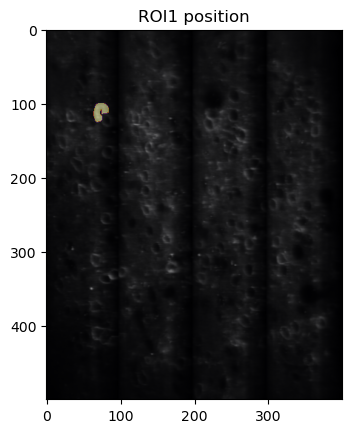

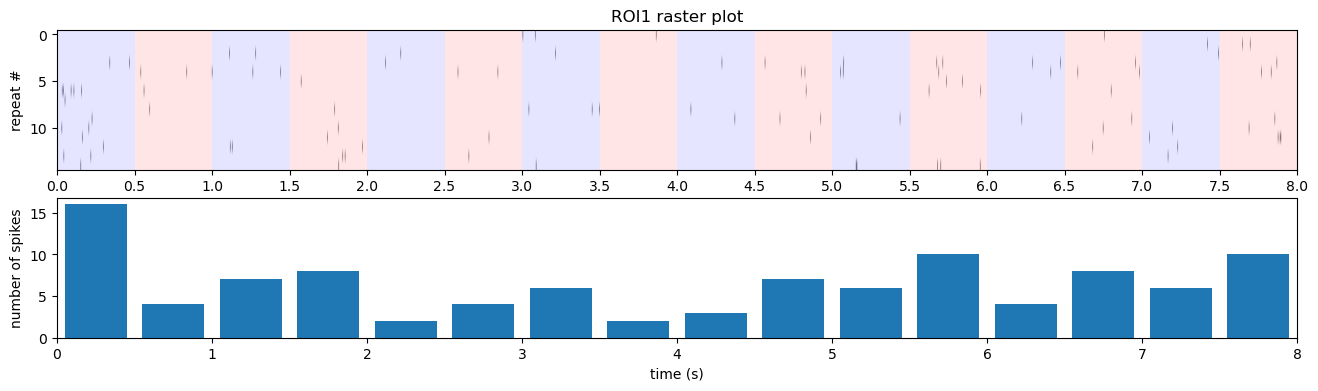

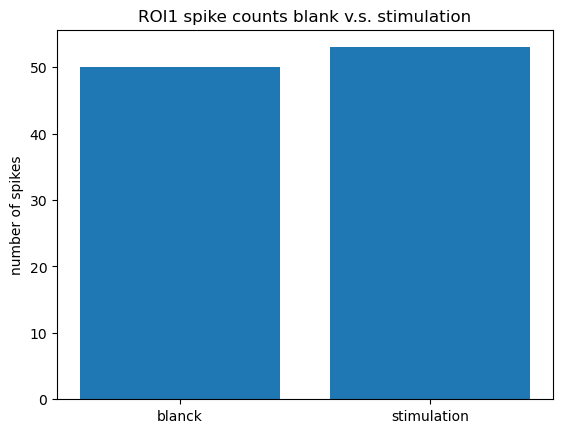

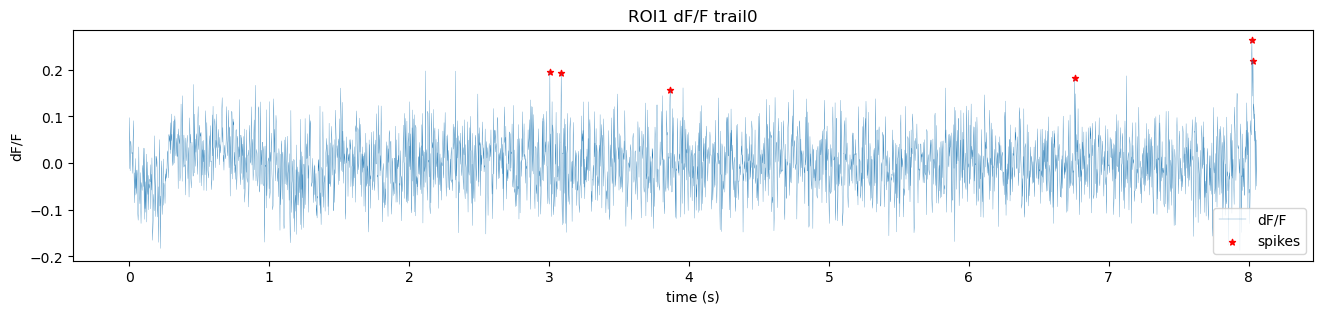

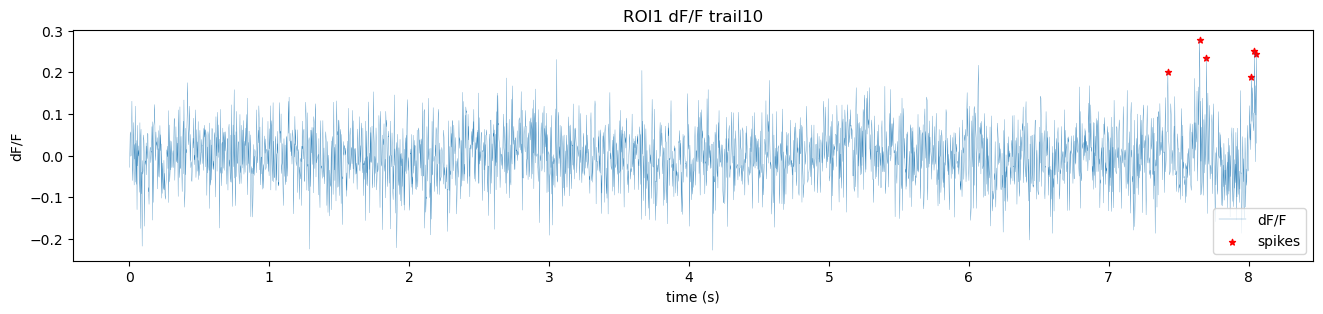

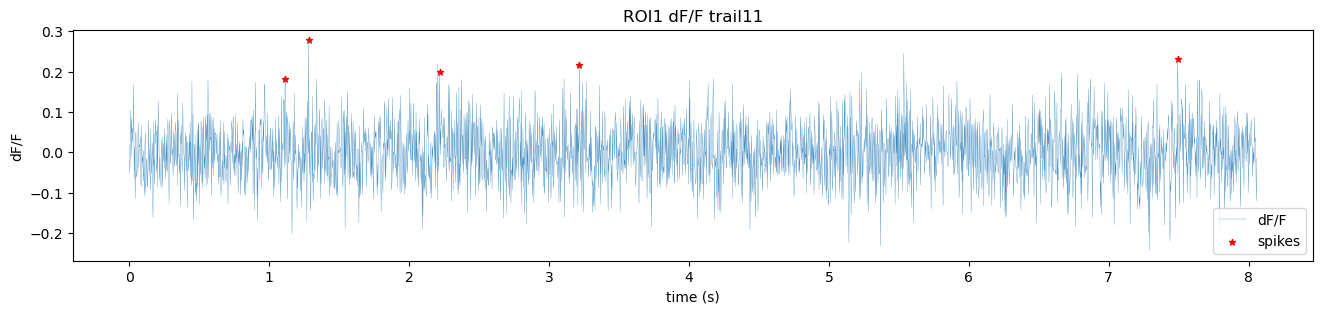

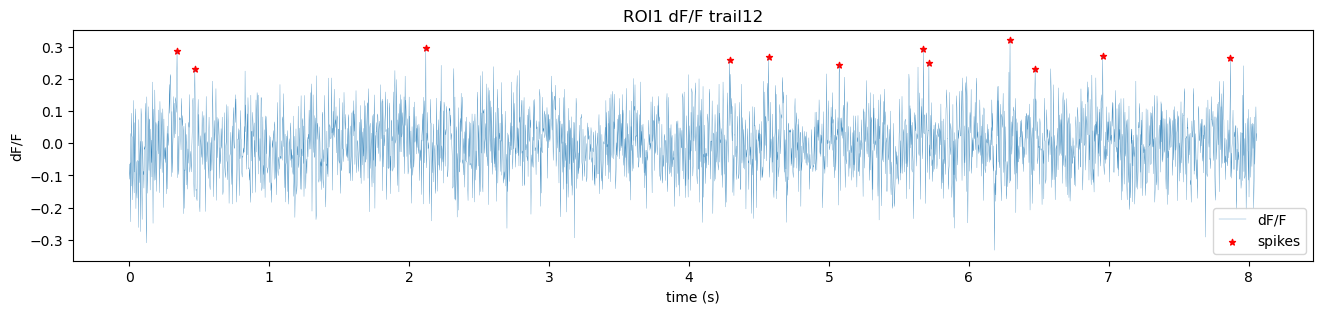

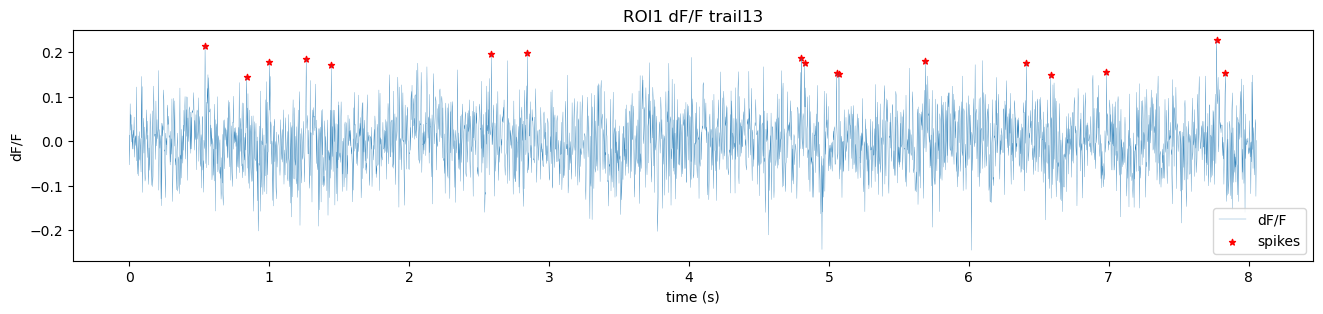

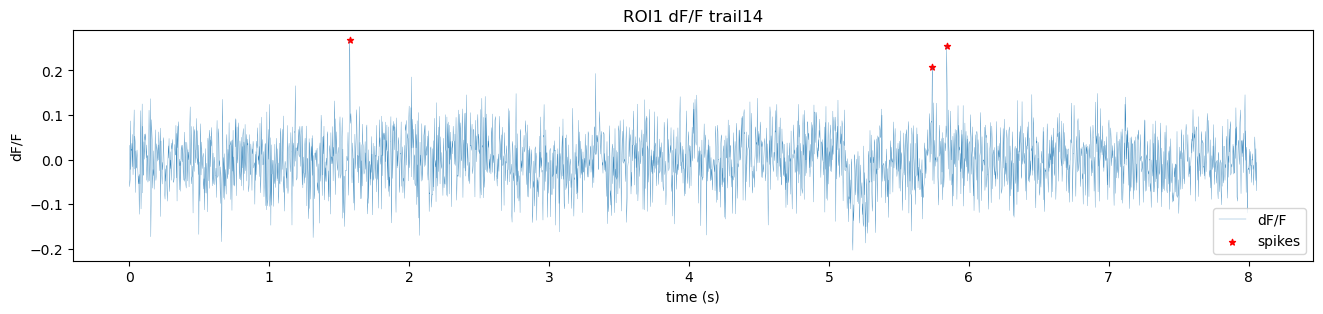

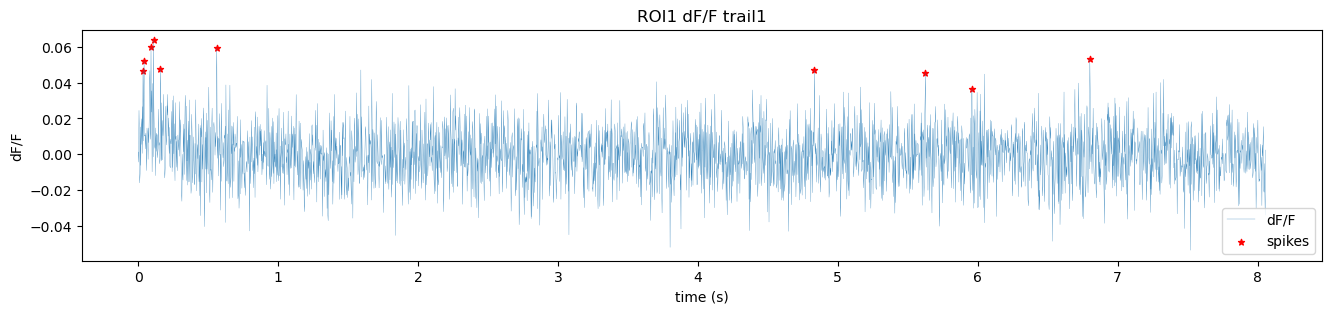

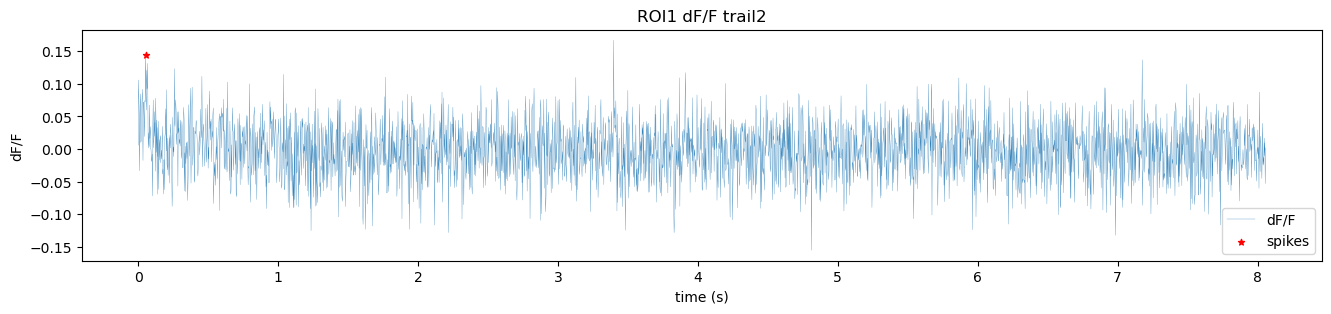

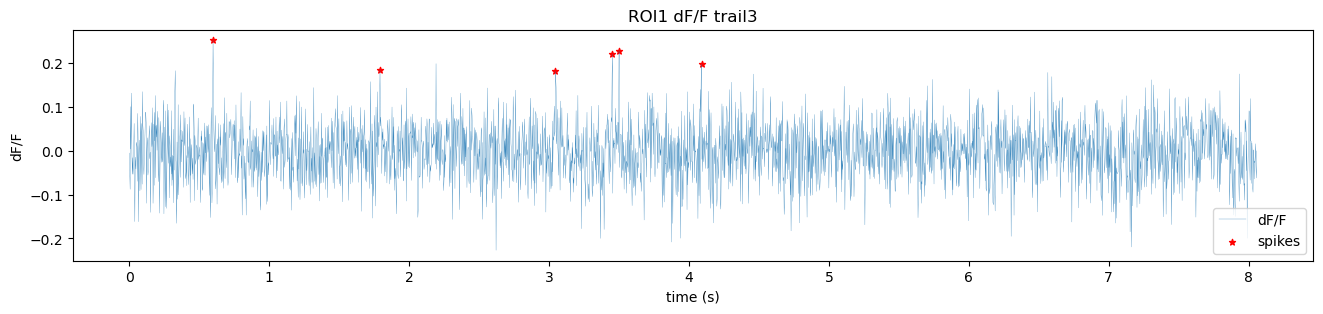

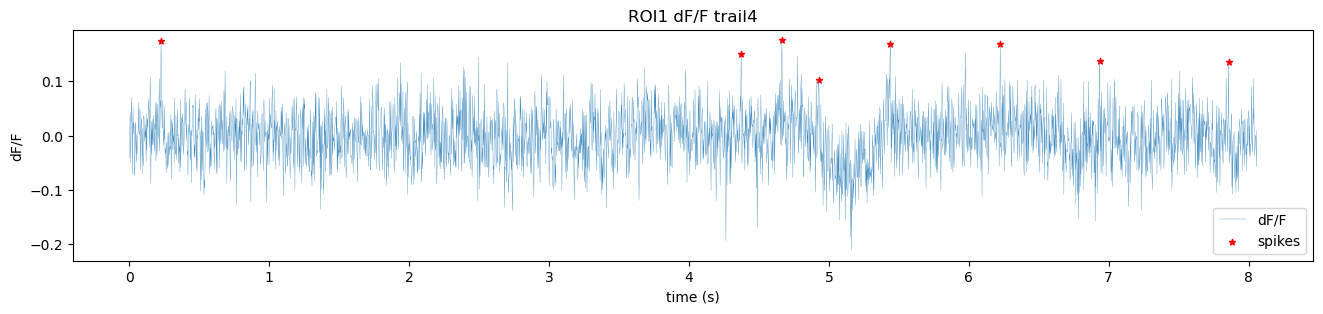

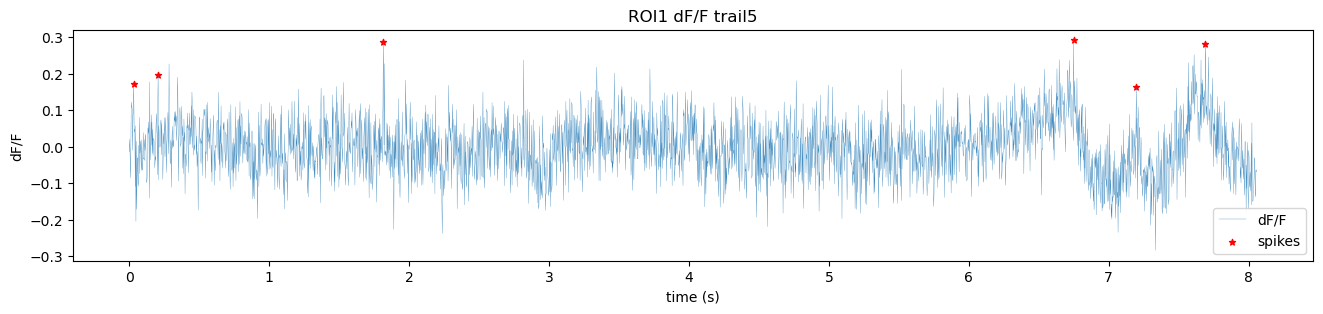

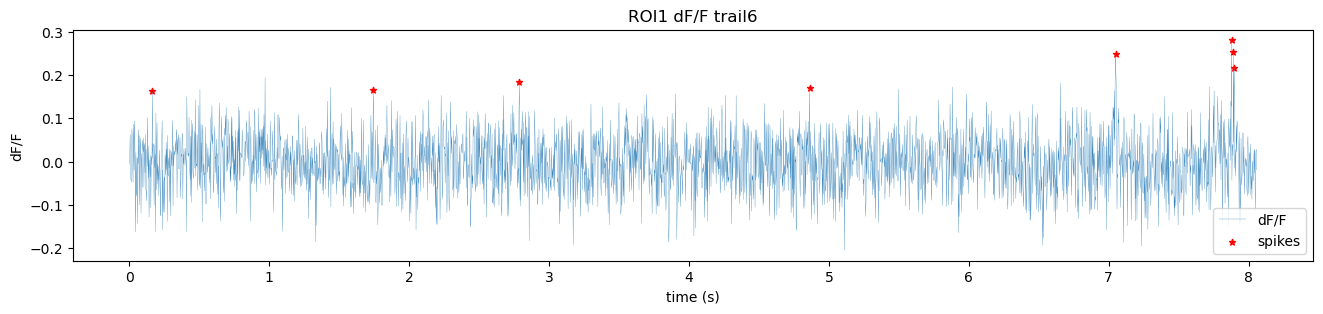

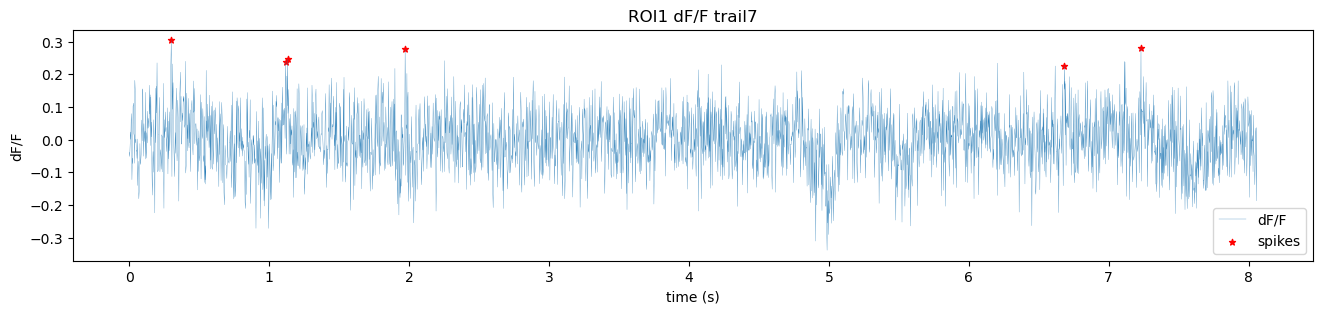

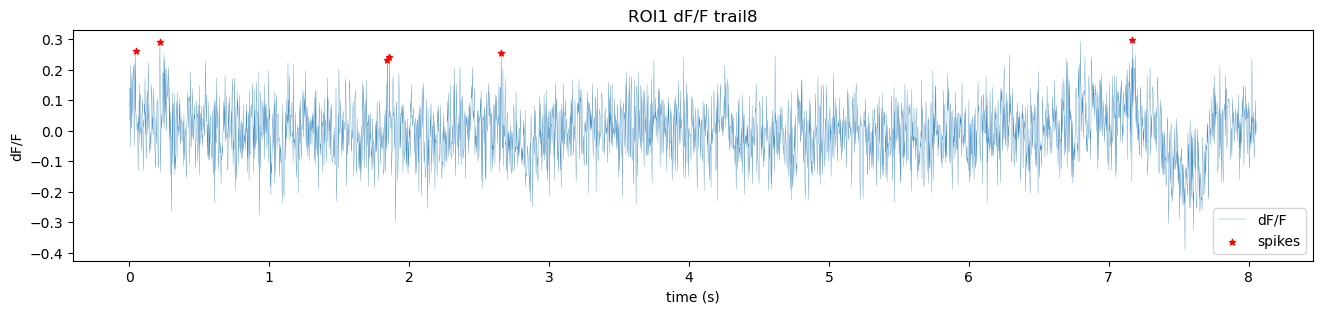

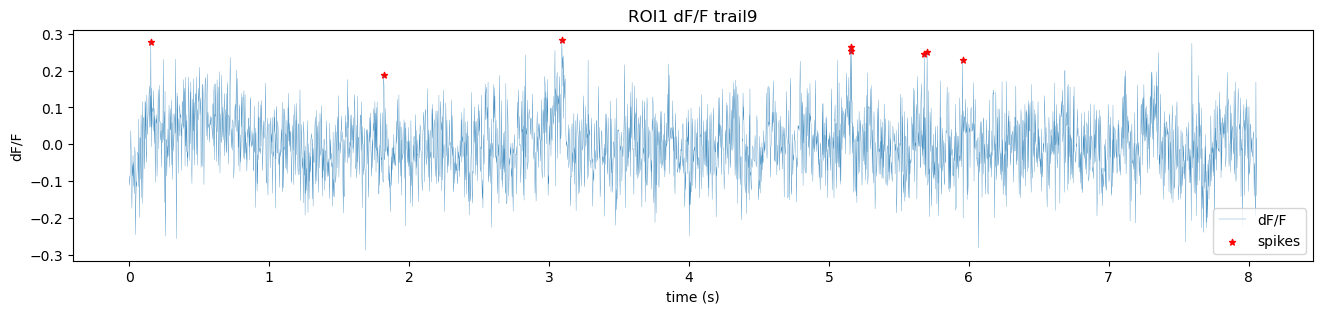

In [14]:
# preview plot
preview_roi = 1
preview_field = 1
create_plots(
    preview_roi,
    preview_field,
    src_template,
    src_masks,
    raster_plots,
    raster_plot_interval_spike_counts,
    blank_start,
    blank_end,
    stim_start,
    stim_end,
    fields_labels,
    src_dffs,
    src_spike_masks,
    src_idx_to_pkgnum_map,
    frame_rate,
    stim_interval_ms,
    dst_dir_path= "./tmp",
    plot_mode = "show")

SAVE_PROGRESS(HISTORY_FILEPATH)

C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-07-08.py


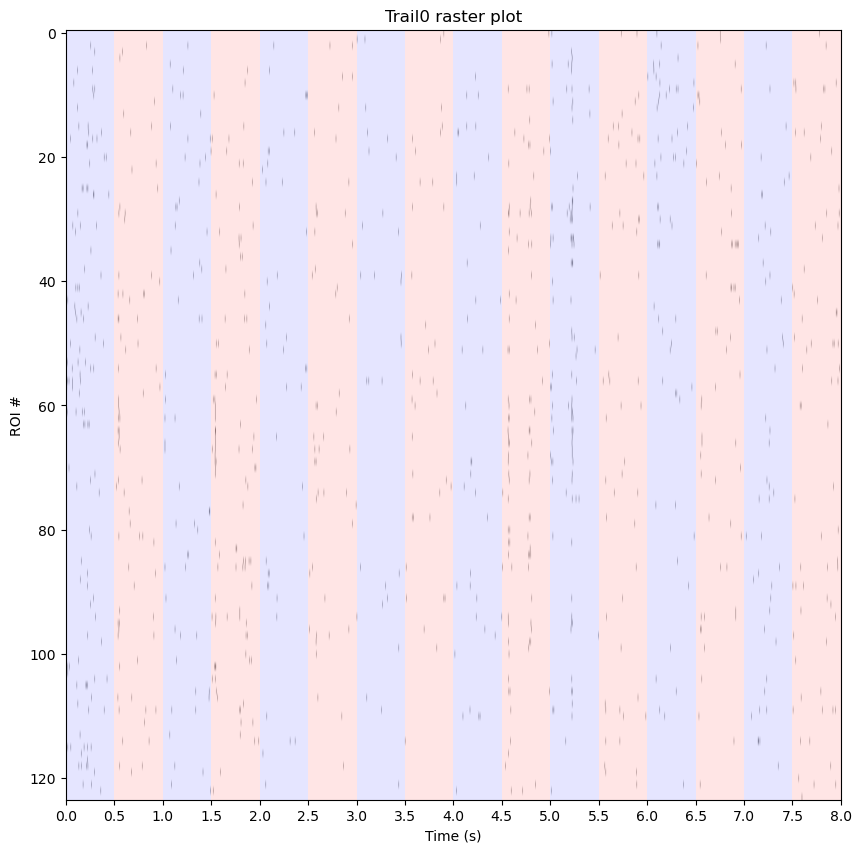

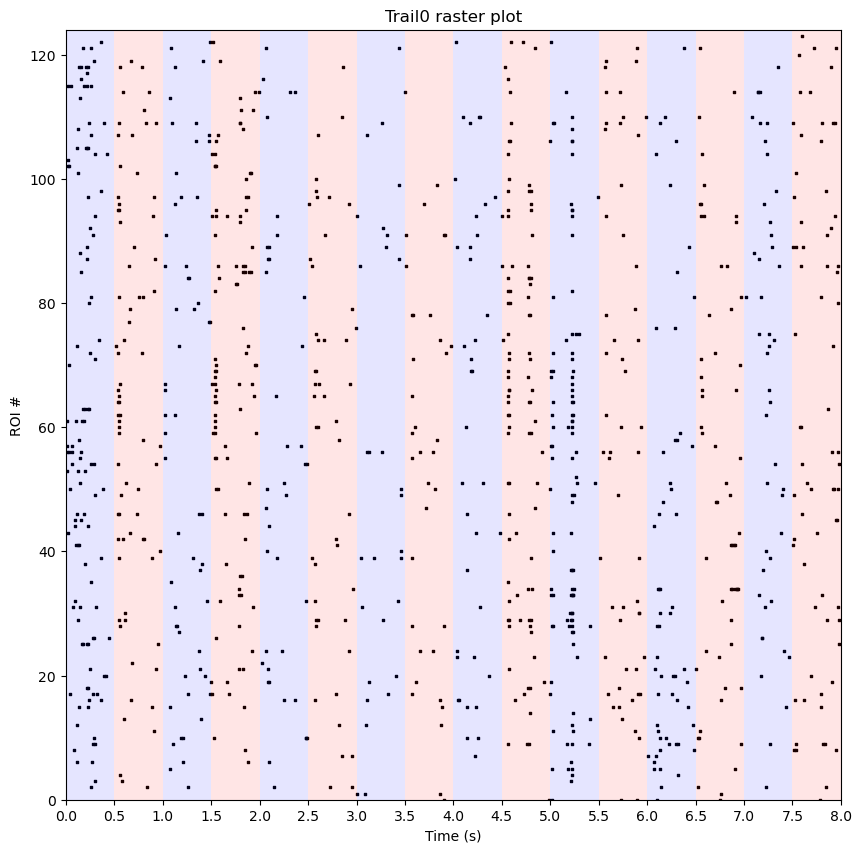

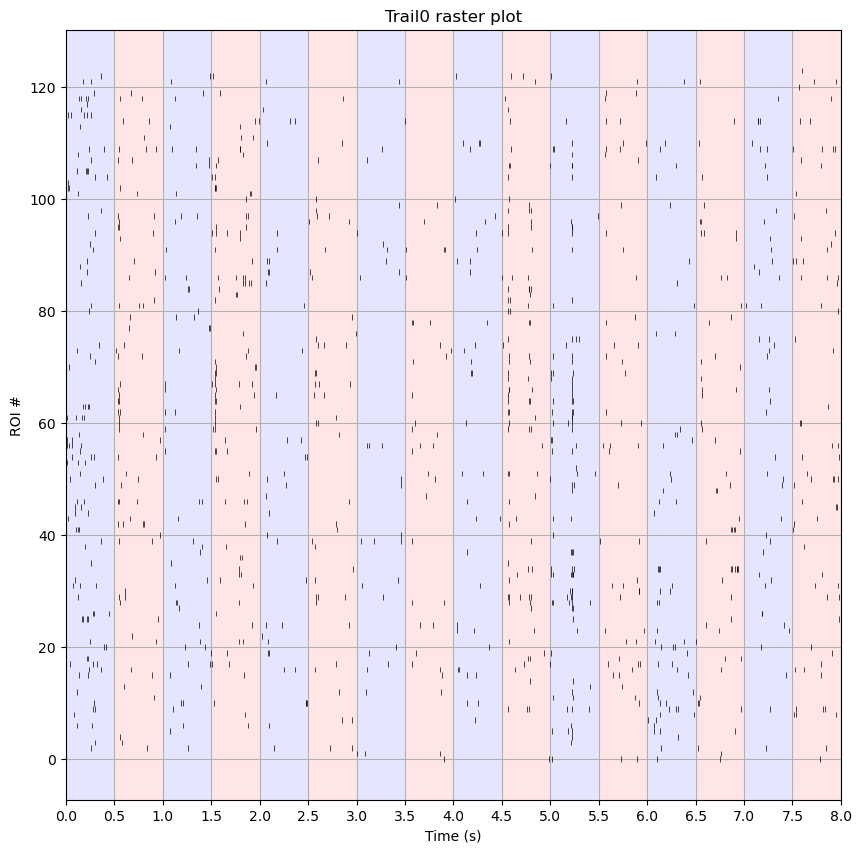

In [35]:
# trail raster plots
preview_pkg = 0
preview_field = 1
trail_raster_plots(
    preview_pkg,
    preview_field,
    raster_plots,
    blank_start,
    blank_end,
    stim_start,
    stim_end,
    fields_labels,
    src_idx_to_pkgnum_map,
    frame_rate,
    stim_interval_ms,
    dst_dir_path = "./tmp",
    plot_mode = "show")

trail_raster_scatter_plots(
    preview_pkg,
    preview_field,
    raster_plots,
    blank_start,
    blank_end,
    stim_start,
    stim_end,
    fields_labels,
    src_idx_to_pkgnum_map,
    frame_rate,
    stim_interval_ms,
    dst_dir_path = "./tmp",
    plot_mode = "show")

trail_raster_event_plots(
    preview_pkg,
    preview_field,
    raster_plots,
    blank_start,
    blank_end,
    stim_start,
    stim_end,
    fields_labels,
    src_idx_to_pkgnum_map,
    frame_rate,
    stim_interval_ms,
    dst_dir_path = "./tmp",
    plot_mode = "show")

SAVE_PROGRESS(HISTORY_FILEPATH)

In [64]:
# rois to plot 

# M:\2023-05-11\M347\FOV02\Group02
# rois_to_plot = [1, 18, 22, 25, 26, 28, 33, 34, 36, 37, 42, 44,
#                48, 54, 62, 68, 70, 72, 73, 74, 76, 77, 78, 80,
#                82, 91, 92, 94, 97, 101, 105, 106, 108, 112, 116,
#                118, 120, 122, 123, 125, 126]
# rois_to_plot = [1, 18, 22, 25, 26, 28, 33, 34, 36, 37, 42, 44,
#                48, 54, 62, 68, 70, 72, 73, 74, 76, 77, 78, 80,
#                82, 91, 92, 94, 97, 101, 105, 106, 108, 112, 116,
#                118, 120, 122, 123, 125, 126]

# # M:\2023-05-11\M347\FOV02\Group01
# rois_to_plot = [2, 12, 18, 21, 22, 28, 29, 32, 33, 35, 36, 38, 40,
#                42, 43, 54, 57, 59, 60, 62, 64, 65, 67, 69, 73, 74, 
#                81, 86, 87, 89, 91, 94, 95, 96, 98, 99, 101, 102,
#                103, 106, 108, 110, 111, 112, 114, 118, ]
# rois_to_plot = [2, 12, 18, 21, 22, 28, 29, 32, 33, 35, 36, 38, 40,
#                42, 43, 54, 57, 59, 60, 62, 64, 65, 67, 69, 73, 74, 
#                81, 86, 87, 89, 91, 94, 95, 96, 98, 99, 101, 102,
#                103, 106, 108, 110, 111, 112, 114, 118, ]

# # M:\2023-05-11\M347\FOV02\Group03
# rois_to_plot = [0, 6, 12, 14, 15, 27, 34, 38, 40, 42, 43, 44, 45, 46, 
#                47, 51, 58, 63, 66, 69, 70, 72, 73, 77, 78, 79, 83,
#                92, 99, 105, 107, 109, 110, 111, 113, 115, 116, 121,
#                123, 124, 126, ]
# rois_to_plot = [0, 12, 14, 15, 27, 34, 38, 40, 42, 43, 44, 45, 46, 
#                47, 51, 58, 63, 66, 69, 70, 72, 73, 77, 78, 79, 83,
#                92, 99, 107, 109, 110, 111, 113, 115, 116, 121,
#                123, 124, 126, ]

# # M:\2023-05-11\M347\FOV02\Group04
# rois_to_plot = [0, 1, 6, 11, 13, 18, 21, 23, 25, 45, 47, 48, 52, 54,
#                56, 60, 62, 68, 74, 75, 77, 78, 82, 92, 93, 94, 99,
#                104, 107, 111, 113, 116, 117, 120, 121, 122, ]
# rois_to_plot = [0, 1, 6, 11, 13, 18, 21, 25, 45, 47, 48, 52,
#                56, 60, 62, 68, 74, 75, 78, 82, 92, 94, 99,
#                104, 107, 111, 113, 116, 117, 120, 121, 122, ]

# rois_to_plot = np.array(rois_to_plot)

rois_to_plot = np.arange(nof_roi)

SAVE_PROGRESS(HISTORY_FILEPATH)

Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlot_2023-06-27.py


In [65]:
# save data
dst_dir_path = os.path.join(dst_root_dir_path, dst_data_sub_dir_name)
if not os.path.isdir(dst_dir_path):
    os.mkdir(dst_dir_path)
    
ifield = which_field
for iroi in rois_to_plot:
    create_plots(
        iroi,
        ifield,
        src_template,
        src_masks,
        raster_plots,
        raster_plot_interval_spike_counts,
        blank_start,
        blank_end,
        stim_start,
        stim_end,
        fields_labels,
        src_dffs,
        src_spike_masks,
        src_idx_to_pkgnum_map,
        frame_rate,
        stim_interval_ms,
        dst_dir_path,
        plot_mode = "save")
    
SAVE_PROGRESS(HISTORY_FILEPATH)

C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:134: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/re

Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlot_2023-06-27.py


In [37]:
# plots 
pgks_to_plot = np.arange(nof_files, dtype = np.int)

SAVE_PROGRESS(HISTORY_FILEPATH)

Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-07-08.py


C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [38]:
dst_dir_path = os.path.join(dst_root_dir_path, dst_data_sub_dir_name)
if not os.path.isdir(dst_dir_path):
    os.mkdir(dst_dir_path)

ifield = which_field
for ipk in pgks_to_plot:
    trail_raster_plots(
        ipk,
        ifield,
        raster_plots,
        blank_start,
        blank_end,
        stim_start,
        stim_end,
        fields_labels,
        src_idx_to_pkgnum_map,
        frame_rate,
        stim_interval_ms,
        dst_dir_path,
        plot_mode = "save")
    
    trail_raster_event_plots(
        ipk,
        ifield,
        raster_plots,
        blank_start,
        blank_end,
        stim_start,
        stim_end,
        fields_labels,
        src_idx_to_pkgnum_map,
        frame_rate,
        stim_interval_ms,
        dst_dir_path,
        plot_mode = "save")
    
SAVE_PROGRESS(HISTORY_FILEPATH)

C:\Users\zhong\micromambaenv\envs\caiman\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Progress saved to: C:\Users\zhong\Documents\IPythonHistory\JEDI2PCollectionPlotVer02_2023-07-08.py


In [ ]:
# saved data to hdf5 file
dst_dir_path = os.path.join(dst_root_dir_path, dst_data_sub_dir_name)
if not os.path.isdir(dst_dir_path):
    os.mkdir(dst_dir_path)
    
dst_hdf5_file_name = "dffs_and_spike_mask.hdf5"

dst_hdf5_file_path = os.path.join(dst_dir_path, dst_hdf5_file_name)

dffs_to_save_hdf5 = src_dffs[rois_to_save_hdf5, :, :]
spike_masks_to_save_hd5f = src_spike_masks[rois_to_save_hdf5, ifield_to_save, :, :]

with h5py.File(dst_hdf5_file_path, "w") as hdf5_file:
    hdf5_file.create_dataset("blank_start", data = blank_start)
    hdf5_file.create_dataset("blank_end", data = blank_end)
    hdf5_file.create_dataset("stim_start", data = stim_start)
    hdf5_file.create_dataset("stim_end", data = stim_end)
    hdf5_file.create_dataset("frame_rate_hz", data = frame_rate)
    hdf5_file.create_dataset("stim_interval_ms", data = stim_interval_ms)
    hdf5_file.create_dataset("rois", data = rois_to_save_hdf5)
    hdf5_file.create_dataset("dffs", data = dffs_to_save_hdf5)
    hdf5_file.create_dataset("spike_masks", data =spike_masks_to_save_hd5f)
    hdf5_file.create_dataset("trial_nums", data = src_idx_to_pkgnum_map)
    
SAVE_PROGRESS(HISTORY_FILEPATH)